# Assignment 5

In [2]:
library(dplyr)
library(emdbook)
library(tidyverse)
library(coda)
library(rjags)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.1     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Linked to JAGS 4.3.2

Loaded modules: basemod,bugs



### Exercise 1

a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over
the measurement time. Determine the posterior mean, median and variance, and compute the 95%
credibility interval.

,mean,median,variance,CI_low,CI_high
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1st obsorve,0.6150000,0.6133341,0.003075000,0.5105105,0.7207207
2nd obsorve,0.7035714,0.7023813,0.002512755,0.8508509,1.1211211


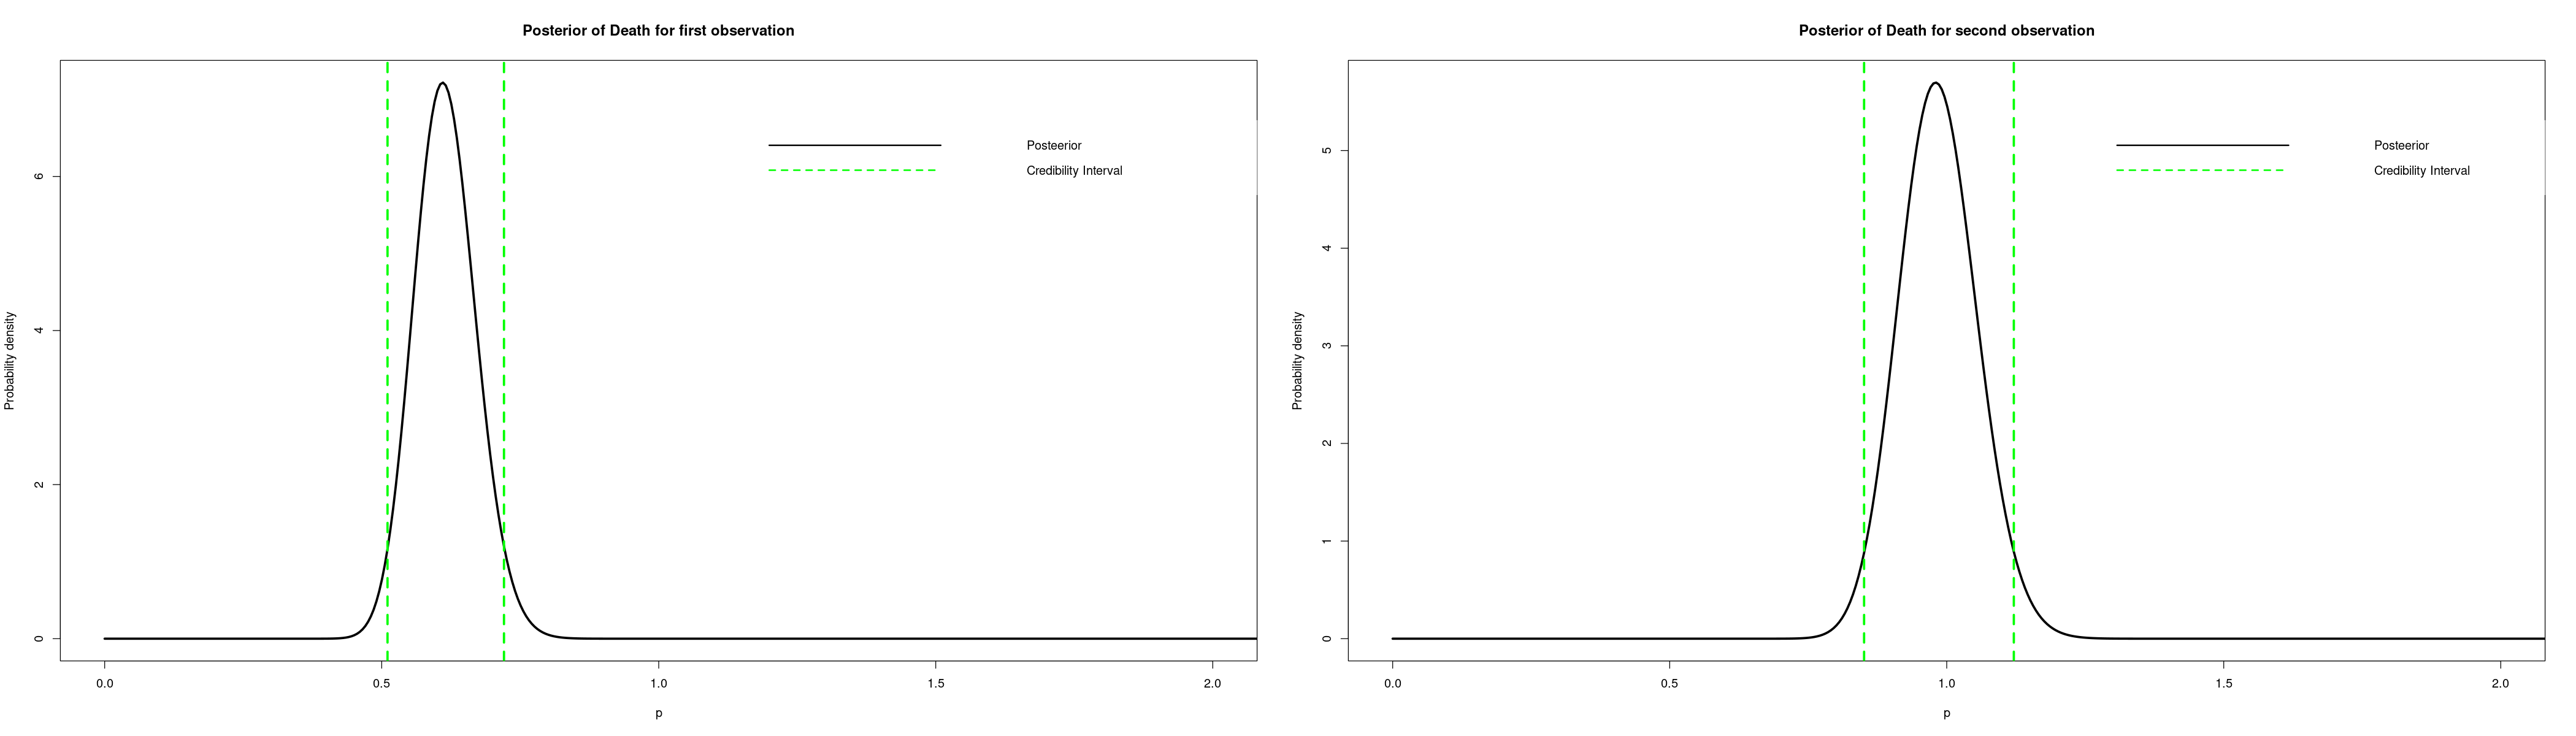

In [3]:
p <- seq(from=0, 5, length.out=1000) # death rate which is 0.001
#observation
death <- c(0,1,2,3,4,5)
n1 <- c(109,65,22,3,1,0)
n2 <- c(144,91,32,11,2,0)

#for n1
#uniform prior
pr.uni <- function(x){
    prior <- dunif(x, 0, 5)
    return(prior)
}

alpha.uni1 <- sum(n1*death)+1
post.uni <- function(x, alpha){
    post <- dgamma(x,shape=alpha, rate=sum(n1))    
    return(post)
}

#credibility interval for 95%
ci.uni1 <- ncredint(p, post.uni(p, alpha.uni1), level=0.95)

#measuring mean, median and variance
mean.uni1 <- alpha.uni1/sum(n1)
median.uni1 <- qgamma(0.5, shape=alpha.uni1, rate=sum(n1))
var.uni1 <- alpha.uni1/((sum(n1))^2)


par(mfrow=c(1, 2))
options(repr.plot.width=35, repr.plot.height=10)
plot(p, post.uni(p, alpha.uni1), type='l', lty=1, lwd=3, xlim=c(0,2),    #put xlim becuase if we plot all the plot we cannot see the difference between two
    xlab="p", ylab='Probability density', main=("Posterior of Death for first observation" ))   #also the 
    abline(v=ci.uni1['lower'], col="green" ,lty=2, lwd=3)
    abline(v=ci.uni1['upper'], col="green" ,lty=2, lwd=3)
    legend('topright',inset=c(-0.5,0.1) ,legend=c('Posteerior', 'Credibility Interval'), col=c('black', 'green'), lty=1:2,lwd=c(2,2) ,box.lty=0)



#uniform for n2

alpha.uni2 <- sum(n2*death)+1


#credibility interval for 95%
ci.uni2 <- ncredint(p, post.uni(p, alpha.uni2), level=0.95)

#measuring mean, median and variance
mean.uni2 <- alpha.uni2/sum(n2)
median.uni2 <- qgamma(0.5, shape=alpha.uni2, rate=sum(n2))
var.uni2 <- alpha.uni2/((sum(n2))^2)

df <- data.frame(
    "mean" = c(mean.uni1, mean.uni2),
    "median" = c(median.uni1, median.uni2),
    "variance" = c(var.uni1, var.uni2),
    "CI_low" = c(ci.uni1['lower'], ci.uni2['lower']),
    "CI_high" = c(ci.uni1['upper'], ci.uni2['upper'])
)
rownames(df) <- c("1st obsorve", "2nd obsorve")
df

plot(p, post.uni(p, alpha.uni2), type='l', lty=1, lwd=3, xlim=c(0,2),            
    xlab="p", ylab='Probability density', main=("Posterior of Death for second observation" ))
    abline(v=ci.uni2['lower'], col="green" ,lty=2, lwd=3)
    abline(v=ci.uni2['upper'], col="green" ,lty=2, lwd=3)
    legend('topright', inset=c(-0.55,0.1),legend=c('Posteerior', 'Credibility Interval'), col=c('black', 'green'), lty=1:2,lwd=c(2,2) ,box.lty=0)

b) assuming now a Jeffreys’ prior,
√
g(λ) ∝ 1/ λ , with λ > 0
compute and plot the posterior distribution for λ, the death rate over the measurement time.
Determine the posterior mean, median and variance, and compute the 95% credibility interval.

,mean,median,variance,CI_low,CI_high
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1st obsorve,0.6108341,0.6125000,0.003062500,0.5105105,0.7207207
2nd obsorve,0.7005956,0.7017857,0.002506378,0.8508509,1.1211211


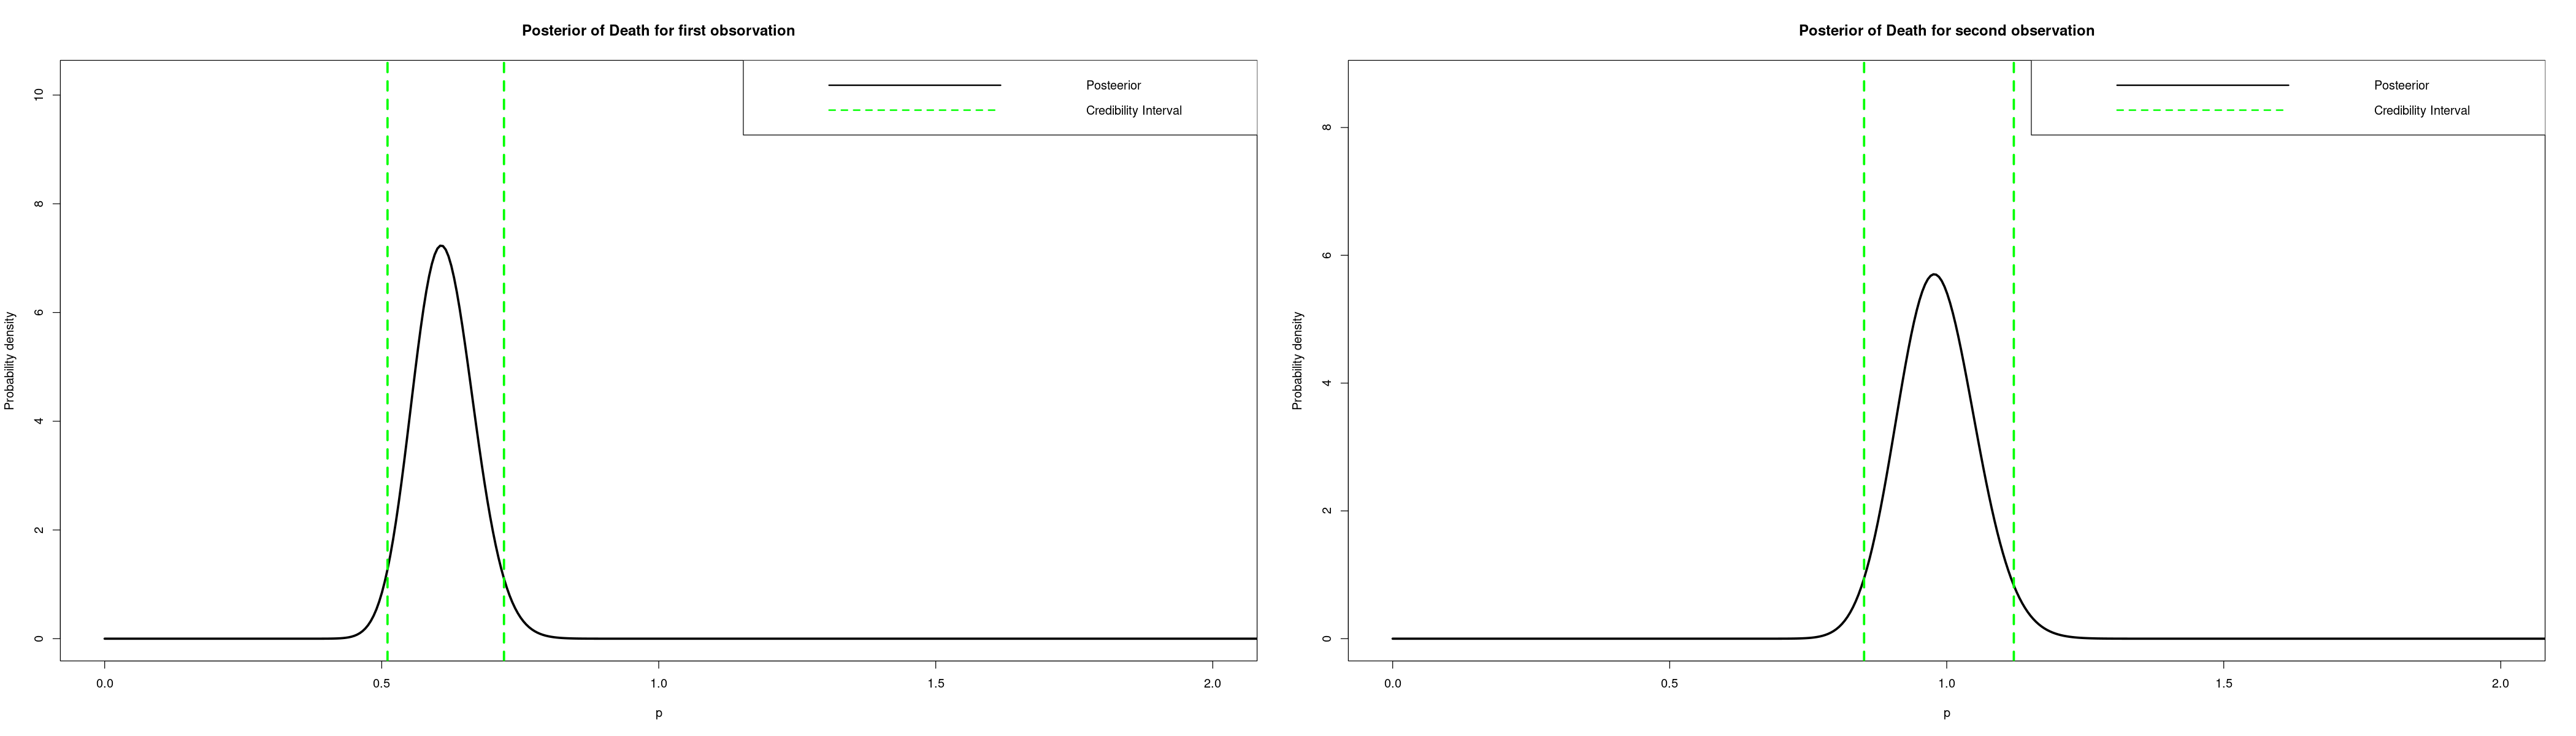

In [4]:
#jeffery for n1

pr.jef <- function(x){
    norm <- integrate(function(x){ 1/sqrt(x)}, lower=0 , upper=5)$value
    prior <- (1/sqrt(x))/norm
    return(prior)
}

alpha.jef1 <- sum(n1*death)+1/2
post.jef <- function(x, alpha){
    post <- dgamma(x,shape=alpha, rate=sum(n1))    #it's better to put alpha in the input variables 
}

#credibility interval
ci.jef1 <- ncredint(p, post.jef(p, alpha.jef1), level=0.95)

#measurinf mean, median and variance
mean.jef1 <- qgamma(0.5, shape=alpha.jef1, rate=sum(n1))
median.jef1 <- alpha.jef1/sum(n1)
var.jef1 <- alpha.jef1/((sum(n1))^2)

par(mfrow=c(1, 2))
options(repr.plot.width=35, repr.plot.height=10)
plot(p, post.jef(p, alpha.jef1), type='l', lty=1, lwd=3, xlim=c(0,2),ylim=c(min(post.jef(p, alpha.jef1),0),max(post.jef(p, alpha.jef1),0)+3),    #put xlim becuase if we plot all the plot we cannot see the difference between two
    xlab="p", ylab='Probability density', main=("Posterior of Death for first obsorvation" ))
    abline(v=ci.jef1['lower'], col="green" ,lty=2, lwd=3)
    abline(v=ci.jef1['upper'], col="green" ,lty=2, lwd=3)
    legend('topright', inset=c(-0.55,0) ,legend=c('Posteerior', 'Credibility Interval'), col=c('black', 'green'), lty=1:2,lwd=c(2,2) ,box.lty=1)



# Jeffery for n2

alpha.jef2 <- sum(n2*death)+1/2


#credibility interval
ci.jef2 <- ncredint(p, post.jef(p, alpha.jef2), level=0.95)

#measurinf mean, median and variance
mean.jef2 <- qgamma(0.5, shape=alpha.jef2, rate=sum(n2))
median.jef2 <- alpha.jef2/sum(n2)
var.jef2 <- alpha.jef2/((sum(n2))^2)

df <- data.frame(
    "mean" = c(mean.jef1, mean.jef2),
    "median" = c(median.jef1, median.jef2),
    "variance" = c(var.jef1, var.jef2),
    "CI_low" = c(ci.jef1['lower'], ci.jef2['lower']),
    "CI_high" = c(ci.jef1['upper'], ci.jef2['upper'])
)
rownames(df) <- c("1st obsorve", "2nd obsorve")
df

plot(p, post.jef(p, alpha.jef2), type='l', lty=1, lwd=3, xlim=c(0,2),ylim=c(min(post.jef(p, alpha.jef2),0),max(post.jef(p, alpha.jef2),0)+3),   #put xlim becuase if we plot all the plot we cannot see the difference between two
    xlab="p", ylab='Probability density', main=("Posterior of Death for second observation" ))
    abline(v=ci.jef2['lower'], col="green" ,lty=2, lwd=3)
    abline(v=ci.jef2['upper'], col="green" ,lty=2, lwd=3)
    legend('topright', inset=c(-0.55, 0) ,legend=c('Posteerior', 'Credibility Interval'), col=c('black', 'green'), lty=1:2,lwd=c(2,2) ,box.lty=1)

### Exercise 2

- solve Exercise 1 with a Markov Chain Monte Carlo. Build your own MCMC, using the functions
introduced during lectures, or using a MCM library like JAGS.

In [9]:
#first write our "model" for uniform prior

modelstr <- "
model {
    # data likelihood
    for (i in 1:length(X)) {
        X[i] ~ dpois(lambda);
    } 
  #uniform prior for lambda
  lambda ~ dexp(0.00001);
}
"
writeLines(modelstr,'ex2-uni.bug')

In [5]:
death <- c(0,1,2,3,4,5)
n1 <- c(109,65,22,3,1,0)
n2 <- c(144,91,32,11,2,0)


In [6]:
zero <- rep(0,109+144)
one <- rep(1,65+91)
two <- rep(2,22+32)
three <- rep(3,3+11)
four <- 3
X <- c(zero,one, two, three, four )
X <- sample(X)

data <- NULL
data$X <- X

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 478
   Unobserved stochastic nodes: 1
   Total graph size: 480

Initializing model


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.6484174      0.0366898      0.0003669      0.0003724 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.5779 0.6232 0.6474 0.6729 0.7233 



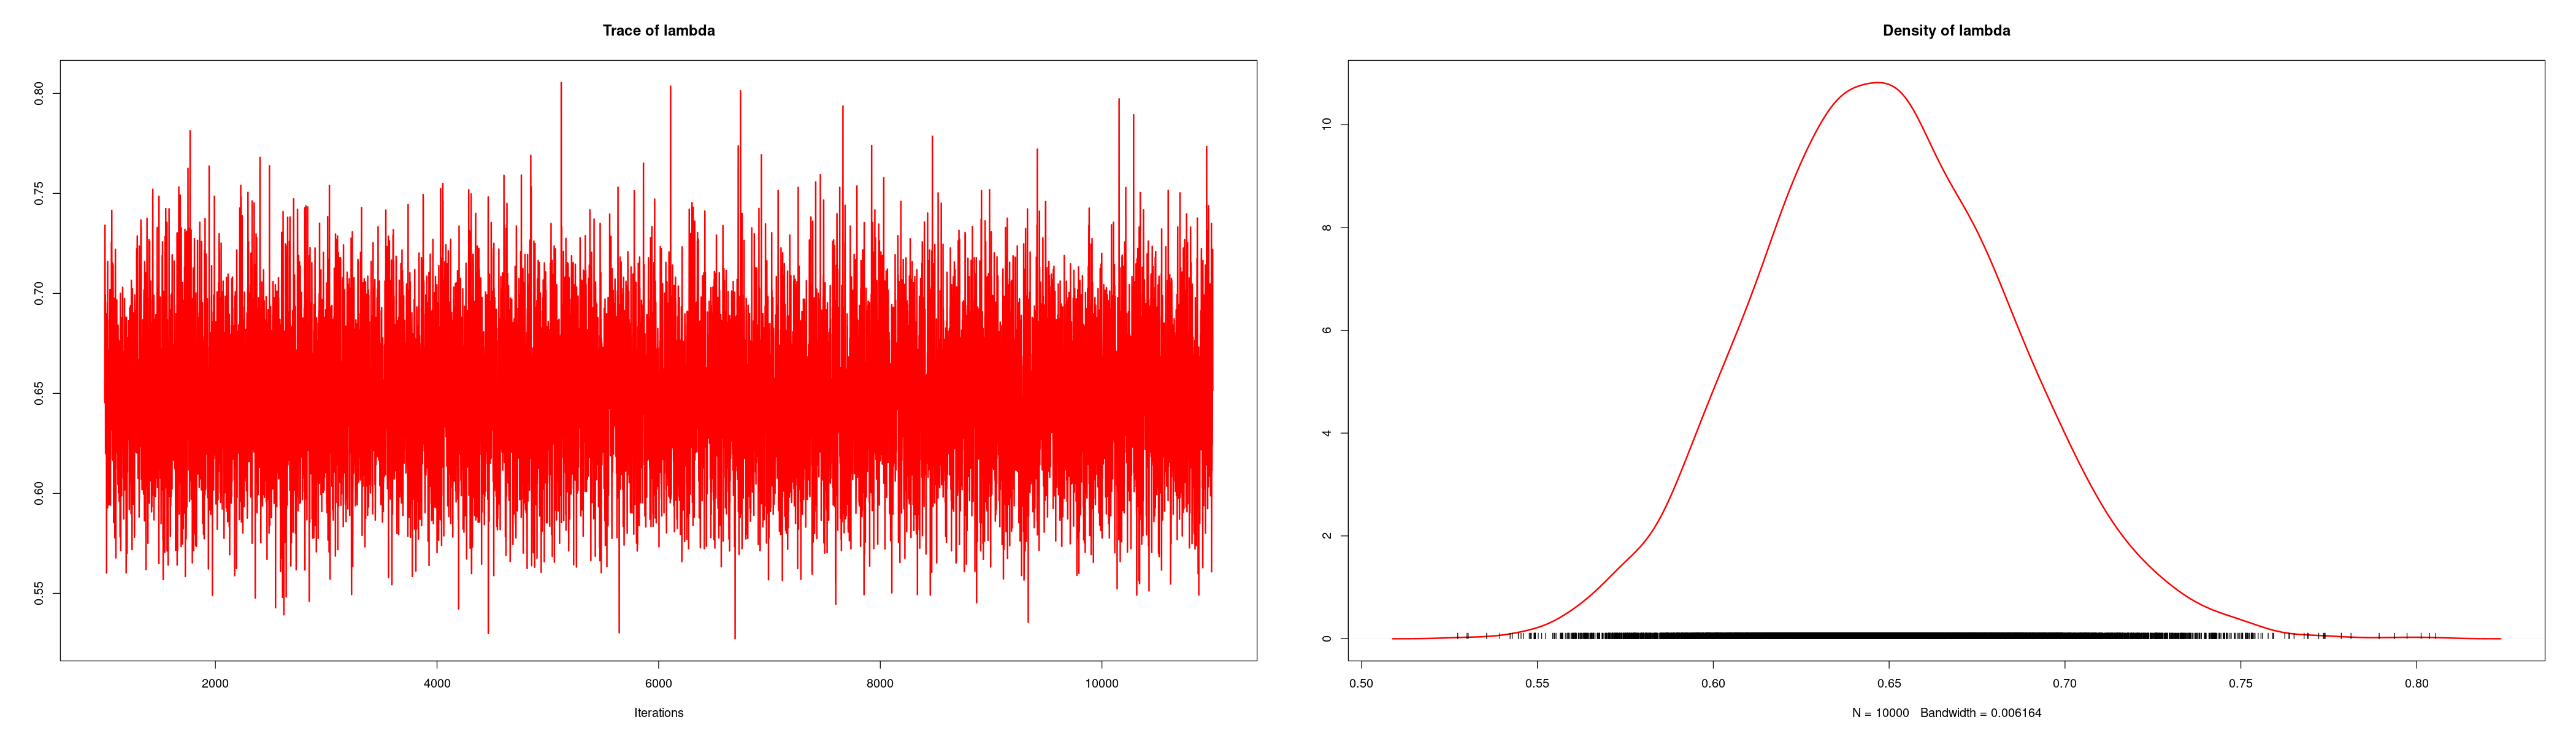

In [32]:
jm <- jags.model(file='ex2-uni.bug', data) 
update(jm, 1000)

# do the markov chain process to calculate lambda
chain <- coda.samples(model=jm, variable.names=c('lambda'), n.iter=10000)

print(summary(chain))

plot(chain, col='red', lwd=2)

In [52]:
#first write our "model" for jeffery's prior

modelstr <- "
model {
    # data likelihood
    for (i in 1:length(X)) {
        X[i] ~ dpois(jeff);
    } 
  #uniform prior for lambda
  lambda ~ dexp(0.00001)
  jeff <- lambda^-2
}
"
writeLines(modelstr,'ex2-jeff.bug')

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 478
   Unobserved stochastic nodes: 1
   Total graph size: 483

Initializing model


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     1.2462255      0.0352627      0.0003526      0.0003526 

2. Quantiles for each variable:

 2.5%   25%   50%   75% 97.5% 
1.180 1.222 1.245 1.269 1.318 



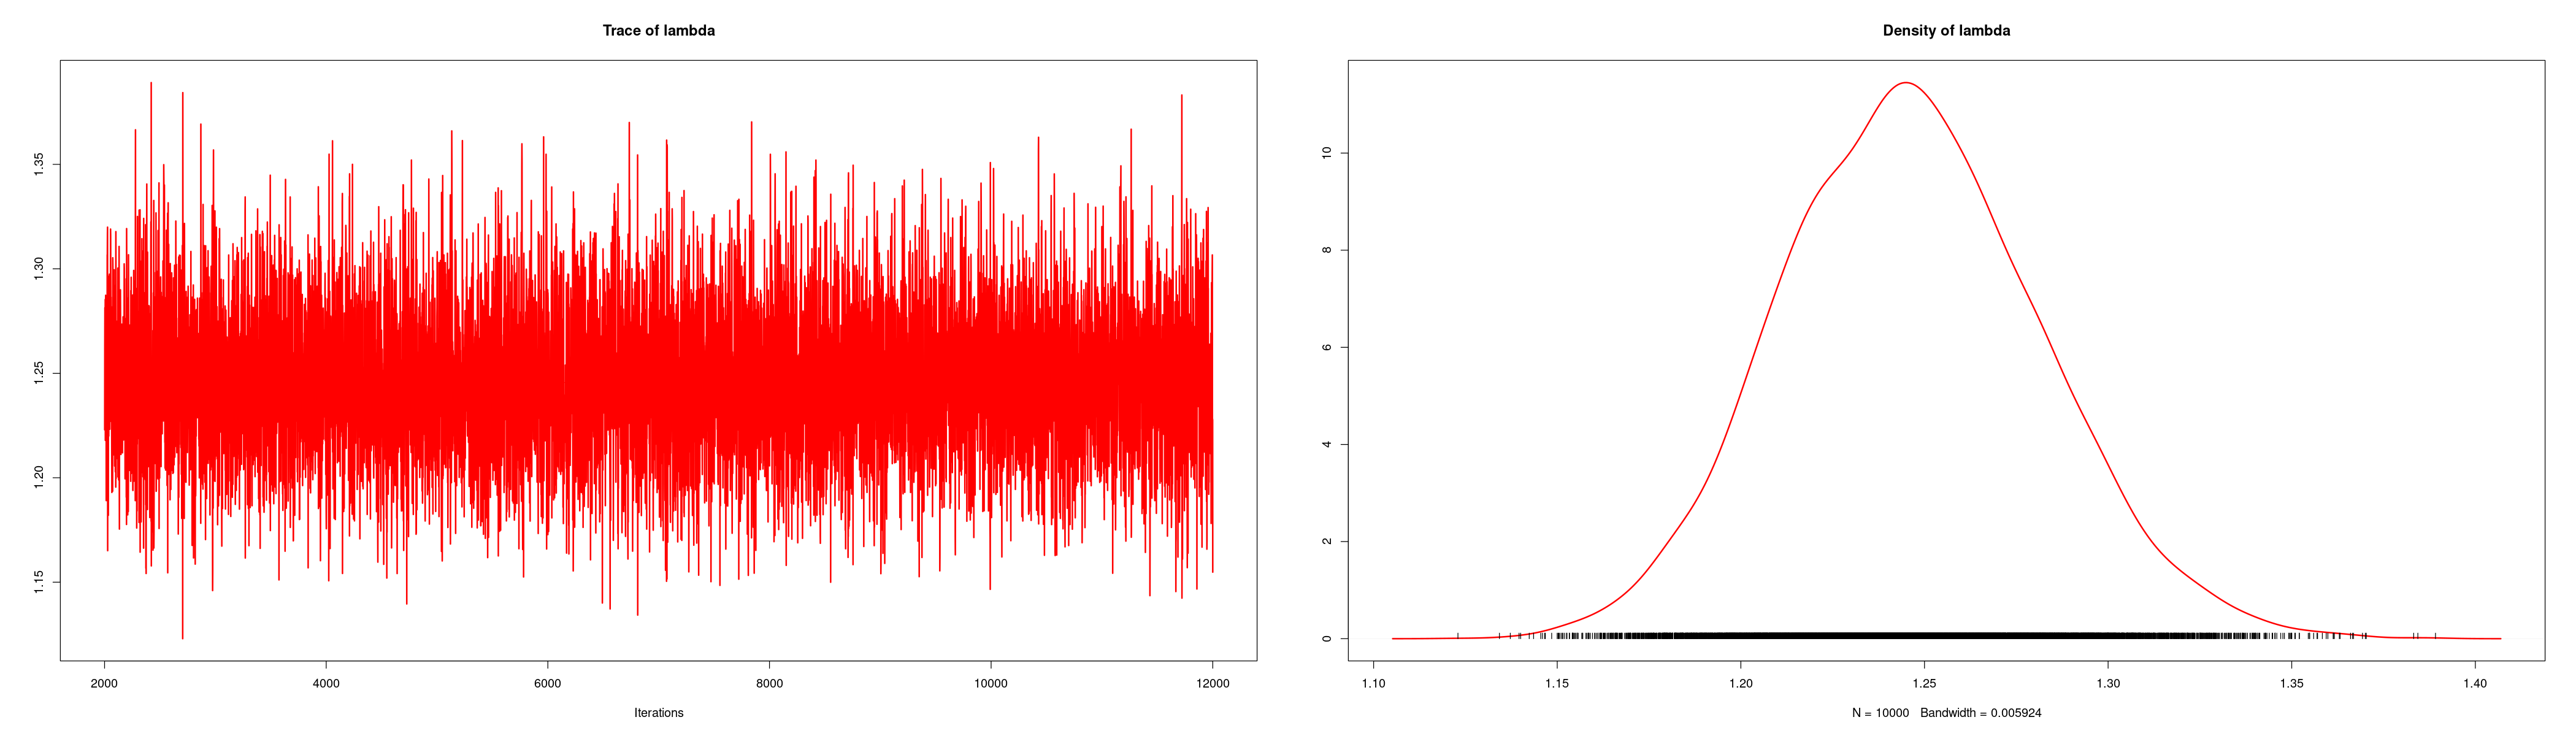

In [33]:

jagm <- jags.model(file='ex2-jeff.bug', data) 
update(jagm, 1000)

# do the markov chain process to calculate lambda
chain <- coda.samples(model=jagm, variable.names= c("lambda"), n.iter=10000)

print(summary(chain))

plot(chain, col='red', lwd=2)

### Exercise 3


a) find the frequentist estimator for p

In [7]:

n <- 116
y <- 11
N <- 1000
p <- seq(0,1,length.out=N)
delta <- 1/N

#frequent estimator
p.f <- y/n
cat("The frequent estimator is", p.f )


The frequent estimator is 0.09482759

 b) usinng a 'Beta(1,10)' prior for p, calculate and posterior distribution $P(p|y)$

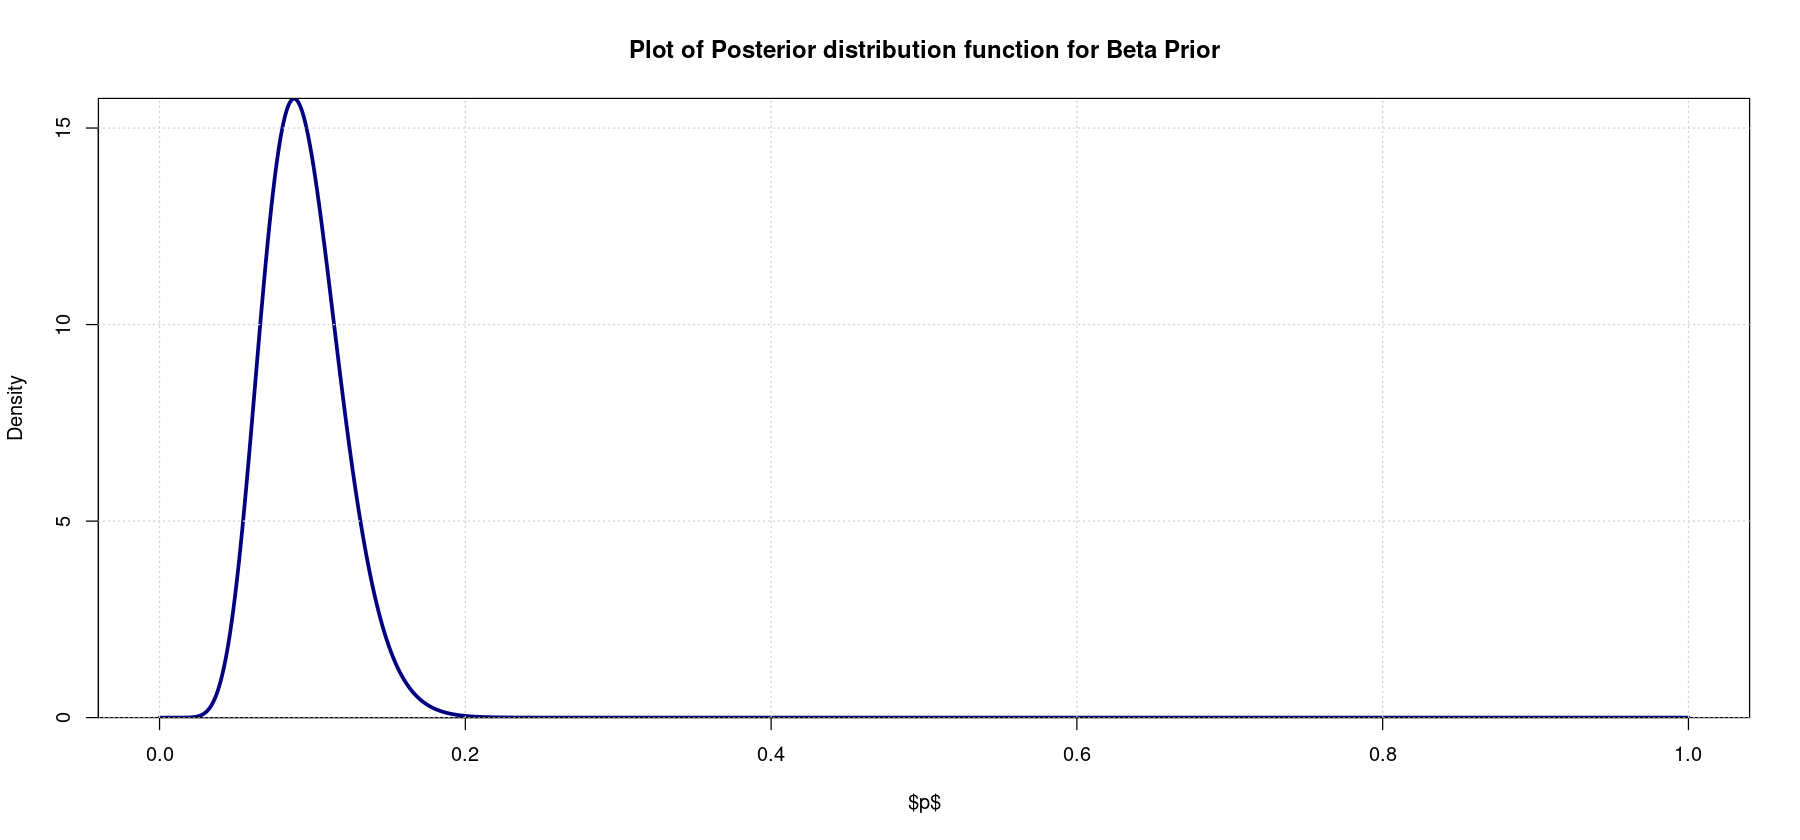

In [8]:

a <- 1
b <- 10
alpha <- a+y
beta <- b+n -y


prior1 <- dbeta(p, shape1=a, shape2=b)
prior1 <- prior1/(delta*sum(prior1))

likeli1 <- dbinom(y, size=n, prob=p)
likeli1 <- likeli1/(delta*sum(likeli1))

post1 <- dbeta(p, alpha, beta)
#post1 <- post1/(sum(post1))

options(repr.plot.width=15, repr.plot.height=7)
plot(p,post1 , xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(post1)+0.005),
     main = "Plot of Posterior distribution function for Beta Prior", lty=1, lwd = 3, xlab="$p$", 
     ylab='Density')
     grid()

c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

,mean,median,variance,CI_low,CI_high
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
values,0.09448819,0.09236085,0.0006684388,0.04704705,0.1451451


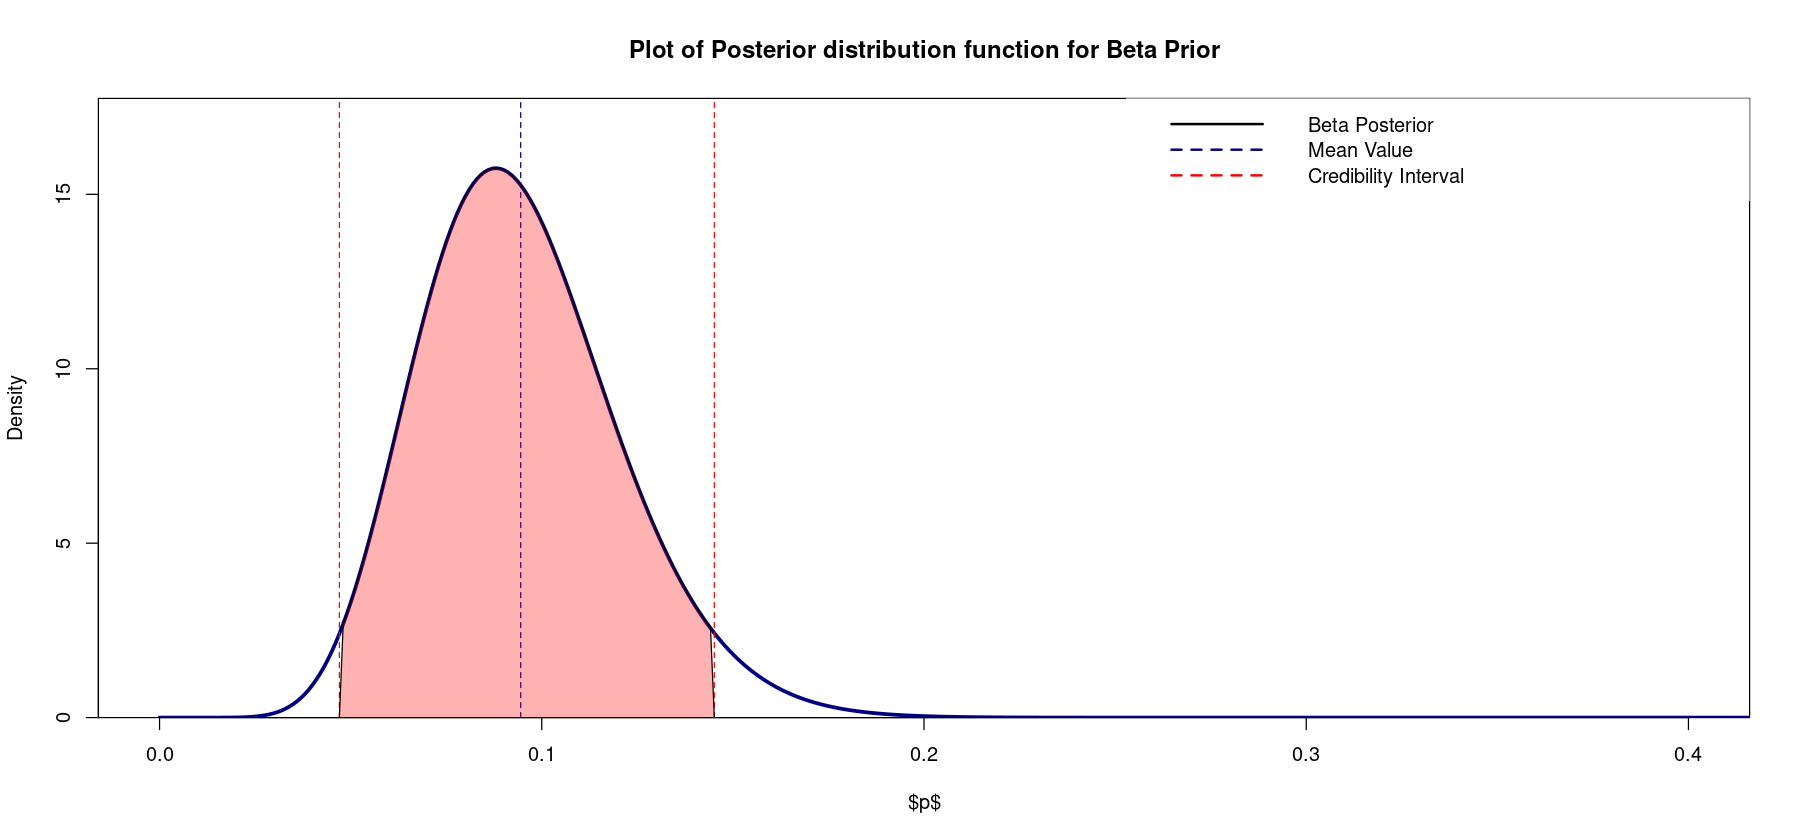

In [9]:

#measure mean, median and variance

mean <- (alpha)/(alpha + beta)
median <- qbeta(0.5 , shape1=alpha , shape2= beta)
var <- (alpha*beta)/((alpha+beta)^2* (alpha+beta+1))

#measuring the crediblility interval
ci <- ncredint(p, post1, level=0.95)

#put all values in a dataframe
df <- data.frame(
    "mean" = c(mean),
    "median" = c(median),
    "variance" = c(var),
    "CI_low" = c(ci['lower']),
    "CI_high" = c(ci['upper'])
)
rownames(df) <- c("values")

plot(p, post1, xaxs='r', yaxs='i', col='navy', type='l', xlim=c(0, 0.4) ,ylim=c(0,max(post1)+2),
     main = "Plot of Posterior distribution function for Beta Prior", lty=1, lwd = 3, xlab="$p$", 
     ylab='Density')
    abline(v=ci['upper'], lty=2 , col='red')
    abline(v=ci['lower'], lty=2 , col='red')
    abline(v=mean, lty=2 , col='navy')
    xp <- c(ci['lower'], p[p>ci['lower'] & p<ci['upper']],ci['upper'] )
    yp <- c(0,post1[which(p > ci['lower'] & p<ci['upper'])], 0)
    polygon(x=xp, y=yp, col=rgb(red=1, green=0, blue=0, alpha=0.3))
    legend('topright', legend=c('Beta Posterior', 'Mean Value', 'Credibility Interval'), col=c('Black', 'navy', 'red'),
    lty=c(1,2,2), lwd=c(2,2,2), box.lty=0)

df

d) test the hypotesis
H ◦ : p = 0.1 versus H 1 : p 6 = 0.1
at 5% level of significance with both the frequentist and bayesian approach

In [10]:

hypo <- 0.1
y <- 0:n
#null hypothesis
null.hypo <- dbinom(y,n,prob=hypo)

ci.hypo <- ncredint(y, null.hypo, level=0.95)
#ci.hypo


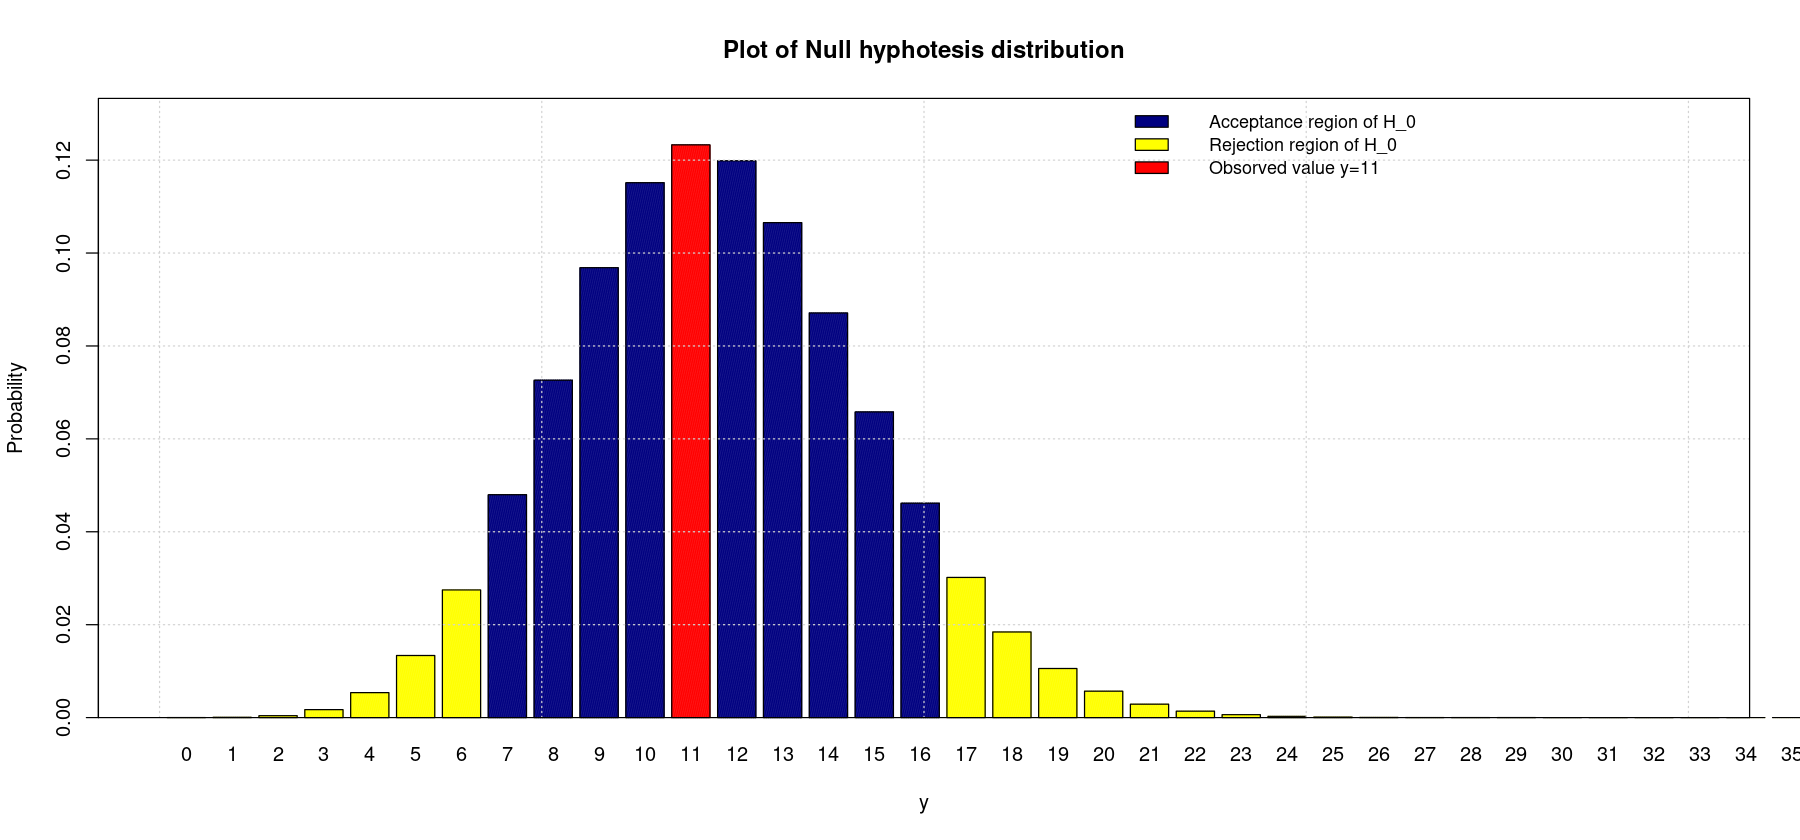

In [11]:
#done
n <- 165
p <- seq(0,1, length.out=1000)
delta <- 1/1000

a <- 1
b <- 10

alpha <- a +y
beta <- b +n-y

post <- dbeta(p, shape1=alpha , shape2 = beta)
prior <- dbeta(p, shape1=a, shape2=b)

#measure mean, median and variance

mean <- (alpha)/(alpha + beta)
median <- qbeta(0.5 , shape1=alpha , shape2= beta)
var <- (alpha*beta)/((alpha+beta)^2* (alpha+beta+1))

#measuring the crediblility interval
ci <- ncredint(p, post, level=0.95)

#will use this part in the plot, use it because want to highlight the y=11
cols <- c('navy', 'yellow')
pos <- (y<= ci.hypo['lower'] | y>= ci.hypo['upper'])


#barplotting            
barplot(null.hypo, names=y , col=ifelse(y==11, "red",cols[pos+1]) ,ylim=c(0,max(null.hypo)+0.01),density=200,
        main="Plot of Null hyphotesis distribution", xlim=c(0,40),
        xlab='y', ylab='Probability' )
        legend('topright', legend=c("Acceptance region of H_0","Rejection region of H_0", 'Obsorved value y=11'),
         fill=c("navy","yellow", 'red'),cex=0.9,box.lty=0)
grid()
box()    #to show the box around the plot and see the numbers

e) find the frequentist estimator for $p$

In [12]:

n <- 165
y <- 9
p.f <- y/n

cat("The frequent estimator is:", p.f)

The frequent estimator is: 0.05454545

f) find a bayesian estimator for p, assuming both a Beta(1, 10) prior for p, and assuming the posterior
probability of the older measurement as the prior for the new one

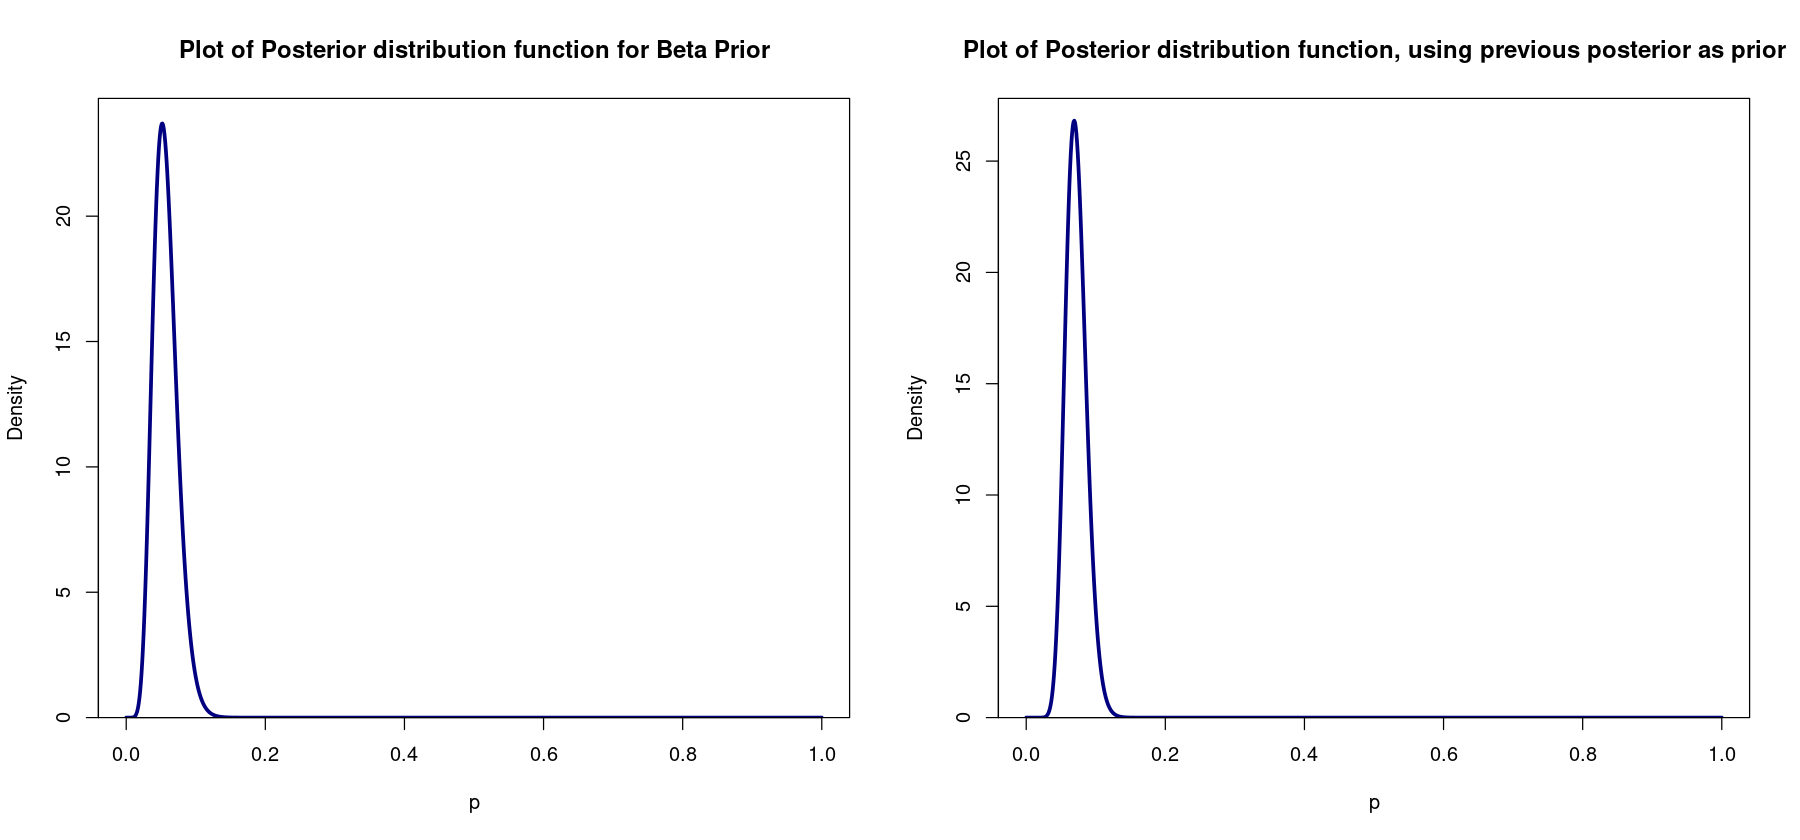

In [13]:

a <- 1
b <- 10
alpha <- a+y
beta <- b+n -y

post2 <- dbeta(p, shape1=alpha , shape2 = beta)
post2 <- post2/(delta*sum(post2))

likeli2 <- dbinom(y , size=n , prob=p)
likeli2 <- likeli2/(delta*sum(likeli2))      #normalize
prior2 <- dbeta(p, alpha, beta)

#using previous posterior as a prior of our new posterior
new.post <- post1*likeli2
new.post <- new.post/(delta*sum(new.post))

par(mfrow=c(1,2))
plot(p,post2 , xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(post2)+1),
     main = "Plot of Posterior distribution function for Beta Prior", lty=1, lwd = 3, xlab="p", 
     ylab='Density')
plot(p, new.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(new.post)+1),
     main = "Plot of Posterior distribution function, using previous posterior as prior", lty=1, lwd = 3, xlab="p", 
     ylab='Density')

g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

In [14]:

#posterior mean with beta prior

p.b <- alpha/(alpha+beta)
ci.b <- ncredint(p, post2 , level=0.95)
mean <- p.b
var <- (1/(n+2))^2 *n *p.b*(1-p.b)
cat("The mean value is:", mean, '\n', 'The vaiance is:', var, '\n','Credibility interval:', ci.b['lower'], ',', ci.b['upper'])

The mean value is: 0.05681818 
 The vaiance is: 0.0003170544 
 Credibility interval: 0.02502503 , 0.09009009

In [15]:
#previous posterior as a new 
p.b.new <- delta*sum(p*new.post)

ci.b.new <- ncredint(p, new.post, level=0.95)

mean.new <- p.b.new
var.new <- delta*sum((p^2)*new.post) - (delta*sum(p*new.post))^2

cat("The mean value is:", mean.new, '\n', 'The vaiance is:', var.new, '\n' ,'Credibility interval:', ci.b.new['lower'], ',', ci.b.new['upper'])

The mean value is: 0.07191781 
 The vaiance is: 0.0002278008 
 Credibility interval: 0.04404404 , 0.1011011

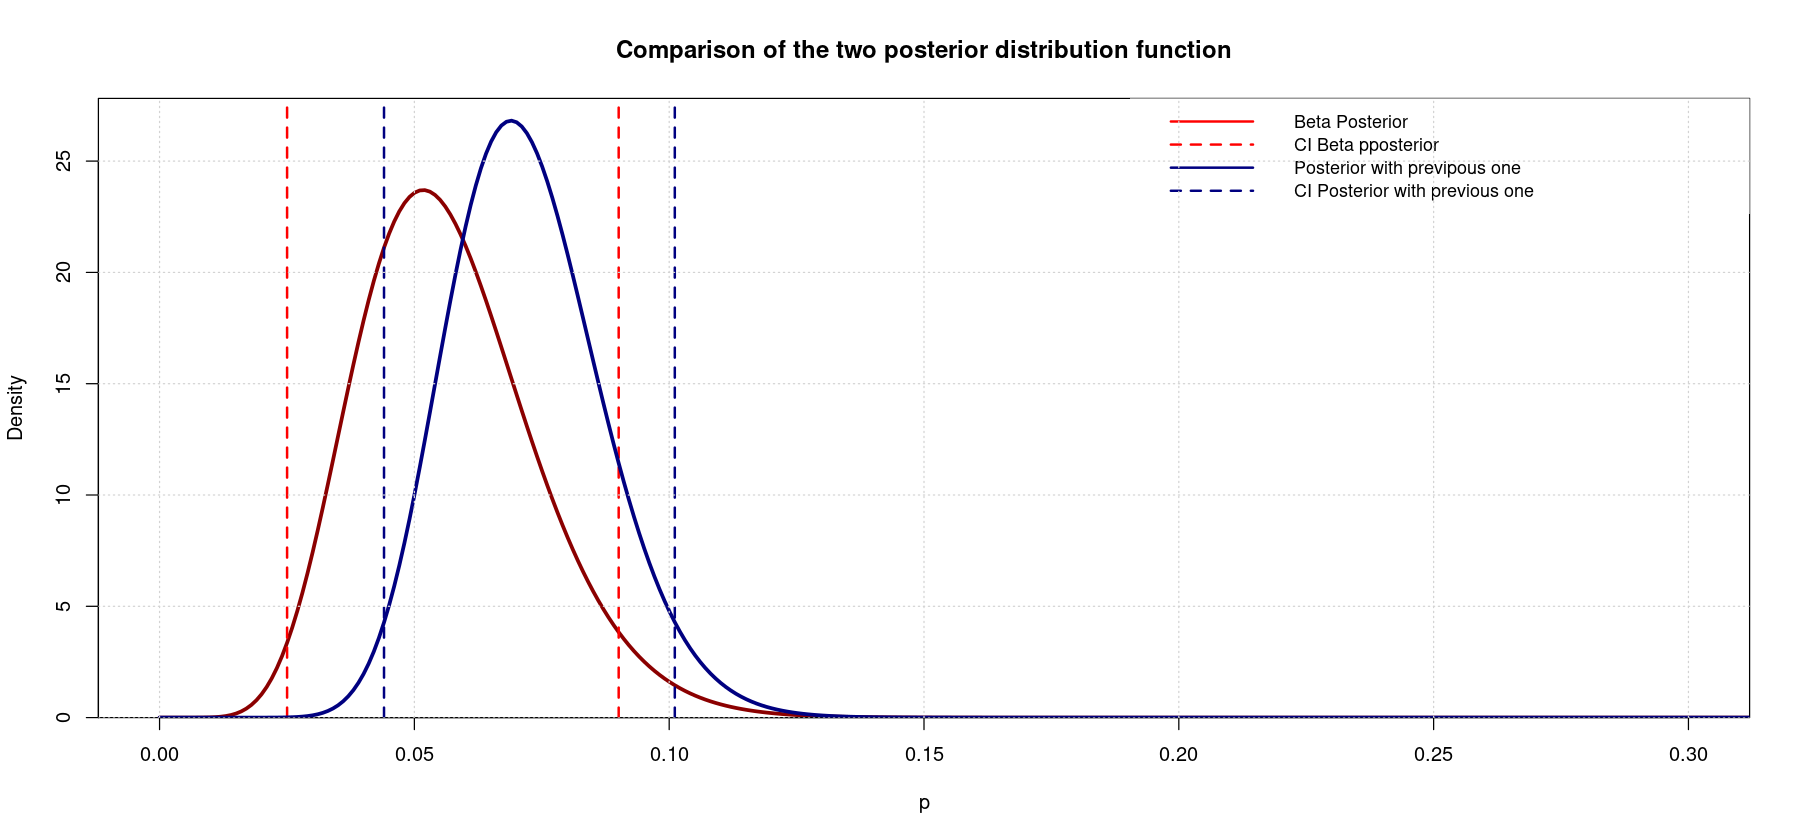

In [16]:
plot(p, post2, xaxs='r', yaxs='i', col='darkred', type='l', main='Comparison of the two posterior distribution function',
    ylim=c(0,max(post2,new.post)+1), xlim=c(0,0.3),
     lty=1, lwd = 3, xlab="p", ylab='Density')
    abline(v=ci.b['lower'], lty=2, lwd=2,col='red')
    abline(v=ci.b['upper'], lty=2, lwd=2, col='red')

    lines(p, new.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(new.post)+0.1),
     lty=1, lwd = 3)

    abline(v=ci.b.new['lower'], lty=2, lwd=2,col='navy')
    abline(v=ci.b.new['upper'], lty=2, lwd=2, col='navy')
    legend('topright', inset=c(-0.1, 0) ,legend=c('Beta Posterior', 'CI Beta pposterior', 'Posterior with previpous one', 'CI Posterior with previous one'),
    col =c('red', 'red', 'navy', 'navy'), lty=1:2 , lwd=2, cex=0.9 , box.lty=0 )
    grid()


h) test the hypotesis
H ◦ : p = 0.1 versus H 1 : p 6 = 0.1
at 5% level of significance with both the frequentist and bayesian approach

In [17]:

hypo <- 0.1
y <- 0:n
#null hypothesis
null.hypo <- dbinom(y,n,prob=hypo)


#computing credibility interval as before
ci.hypo <- ncredint(y, null.hypo, level=0.95)


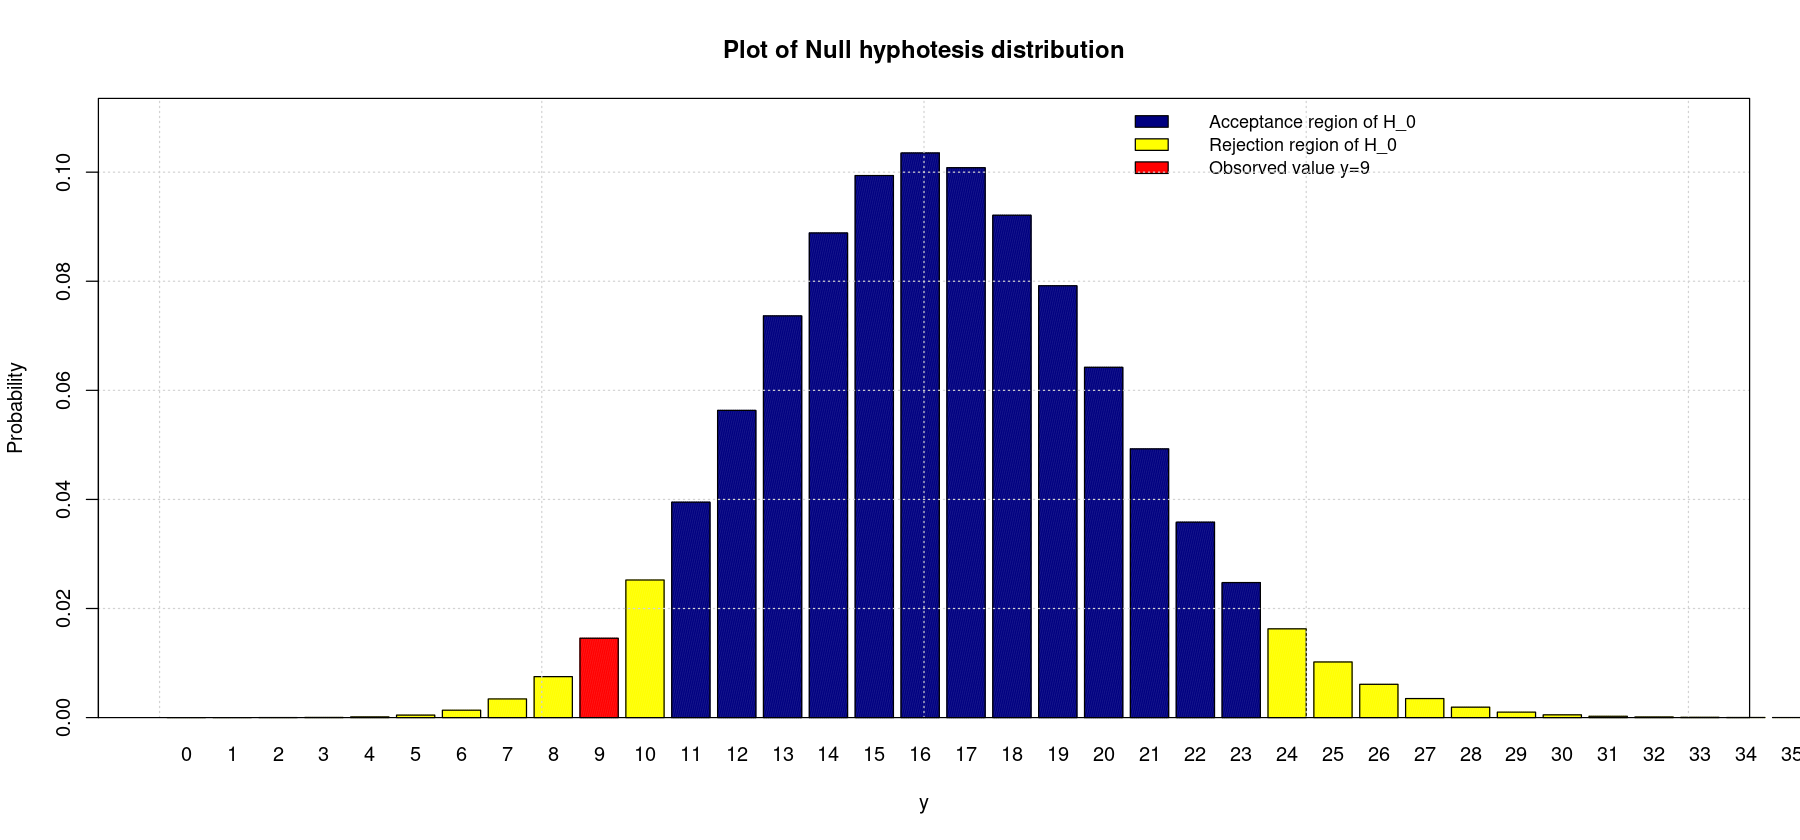

In [18]:


#will use this part in the plot, use it because want to highlight the y=9 like before
cols <- c('navy', 'yellow')
pos <- (y<= ci.hypo['lower'] | y>= ci.hypo['upper'])


#barplotting            
barplot(null.hypo, names=y , col=ifelse(y==9, "red",cols[pos+1]) ,ylim=c(0,max(null.hypo)+0.01),density=200,
        main="Plot of Null hyphotesis distribution", xlim=c(0,40),
        xlab='y', ylab='Probability' )
        legend('topright', legend=c("Acceptance region of H_0","Rejection region of H_0", 'Obsorved value y=9'),
         fill=c("navy","yellow", 'red'),cex=0.9,box.lty=0)
grid()
box()  #to show the box around thr plot and see the numbers

The value $p_0 =0.1$ lies outside of the 95% credible interval, so we reject the null hypothesis $H_0$

### Exercise 4

- analyze the data of Exercise 3 and solve points (b) and (c) using a MCMC with JAGS

In [78]:
#first write our "model"

modelstr <- "
model {
	p ~ dbeta(a.prior,b.prior);
	
	for(i in 1:length(X)) {
		X[i] ~ dbin(p,n);
	}
	
	y ~ dbin(p,n);
}
"
writeLines(modelstr,'ex6.bug')

In [22]:
data <- NULL
data$n <- 116
data$X <- 11
data$a.prior <- 1
data$b.prior <- 10


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 2
   Total graph size: 6

Initializing model


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.0945938      0.0256875      0.0002569      0.0003550 

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5% 
0.04988 0.07640 0.09241 0.11087 0.14947 



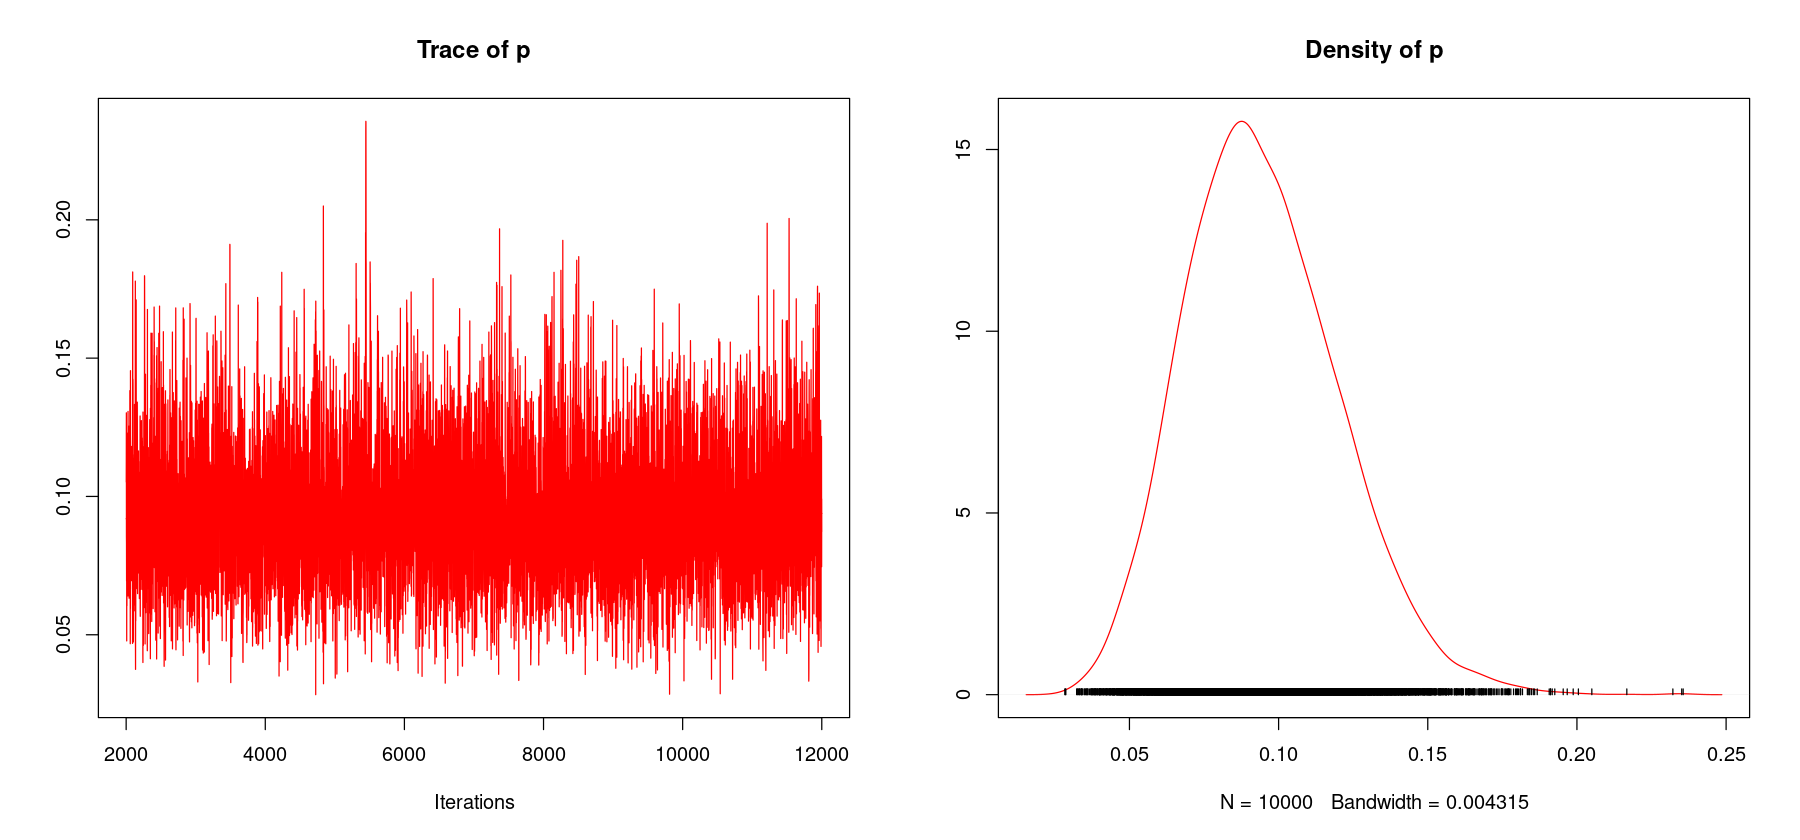

In [23]:
jm <- jags.model(file='ex6.bug', data)

update(jm, 1000)  # the sampling is done 10000 times with no thining

chain <- coda.samples(model=jm , variable.names=c('p'), n.iter = 10000) #put the jags variable in coda to compute our mcmc model
print(summary(chain))

par(mfrow=c(1,2))
plot(chain , col='red')

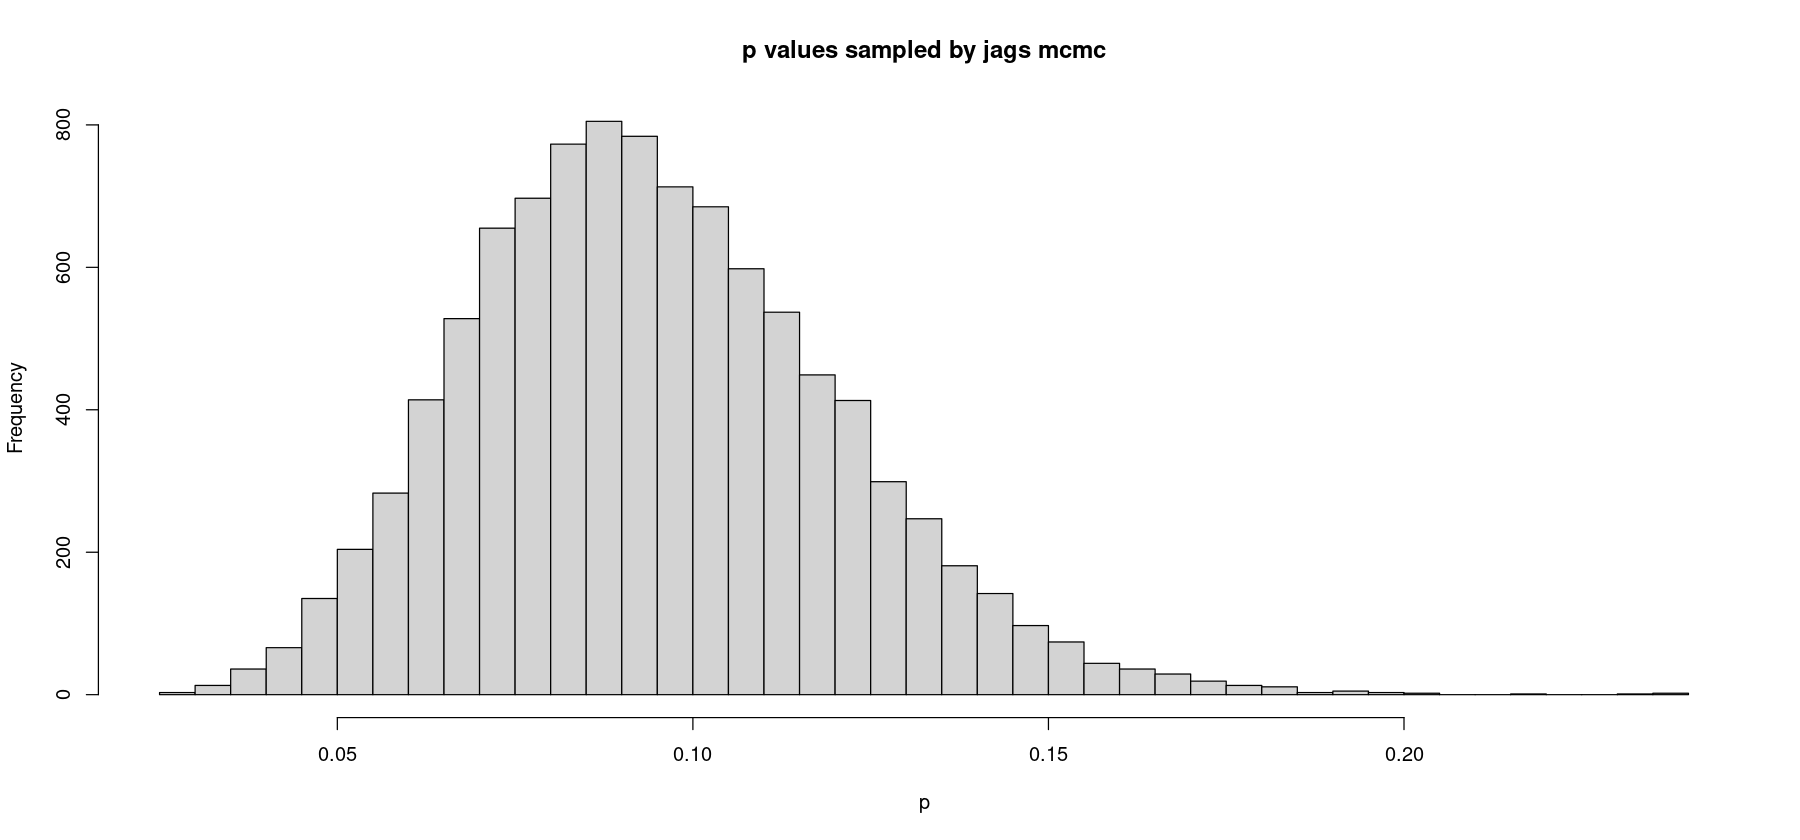

In [24]:
chain.df <- as.data.frame(as.mcmc(chain))
# to see the histogram plot of the mcmc
hist(chain.df$p , breaks=70, main='p values sampled by jags mcmc', xlab='p') 